## importing necessary libruaries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## data collection and processing

In [4]:
# loading the csv data to a pandas dataframe
gold_dataset=pd.read_csv(r"C:\Users\USER\Downloads\gld_price_data.csv")

In [5]:
# print first 5 rows in datafrsme
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
# print last 5 rows in the dataframe
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# getting some absic information 
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the number of missing values
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# gettingthe statistics measures of the data
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## correlation :
### 1.positive correlation
### 2.negative correlation

In [17]:
# Convert date strings to datetime objects
gold_dataset['Date'] = pd.to_datetime(gold_dataset['Date'], errors='coerce')
gold_dataset_numeric = gold_dataset.select_dtypes(include=[np.number])

gold_dataset_numeric = gold_dataset_numeric.dropna()  # Drop rows with missing values
correlation = gold_dataset_numeric.corr()
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


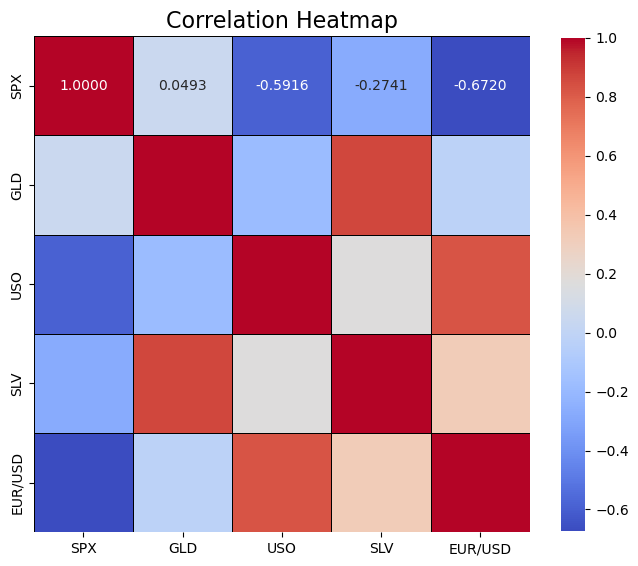

In [30]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,
            annot=True,            # Show correlation values
            fmt=".4f",            # Format for the annotation
            cmap='coolwarm',      # Color palette
            square=True,          # Make cells square-shaped
            cbar_kws={"shrink": .8},  # Color bar size
            linewidths=0.5,      # Lines between cells
            linecolor='black')

plt.title('Correlation Heatmap', fontsize=16)

# Show the heatmap
plt.show()

In [31]:
# correlation values of gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_10148\3085787189.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'],color='green')
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GLD', ylabel='Density'>

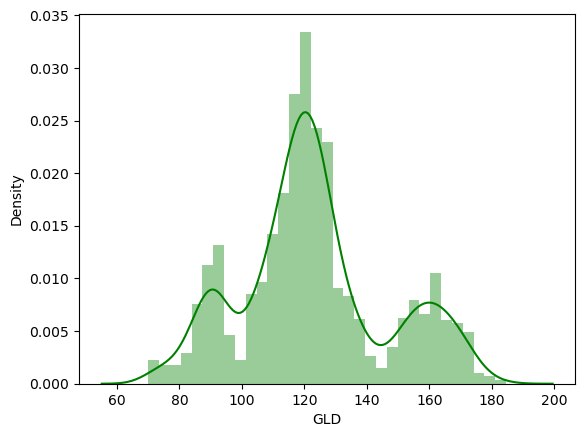

In [32]:
# checking the distribution of the gold price
sns.distplot(gold_dataset['GLD'],color='green')

## spllitting the features and target

In [34]:
x=gold_dataset.drop(['Date','GLD'],axis=1)
y=gold_dataset['GLD']

In [35]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [37]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

### splitting the training data and testing data 

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,
                                               random_state=2)

In [40]:
print(x.shape,x_train.shape,x_test.shape)

(2290, 4) (1832, 4) (458, 4)


## model training : random forest regression

In [41]:
regressor=RandomForestRegressor(n_estimators=100)

In [42]:
# training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

##  model evaluation

In [43]:
# prediction on test data
test_data_pred=regressor.predict(x_test)

In [44]:
test_data_pred

array([168.61459943,  82.08489971, 115.97909999, 127.66470083,
       120.86320134, 154.69999753, 150.07709864, 126.05760052,
       117.52669867, 125.92810073, 116.77970117, 171.16700105,
       141.53009861, 167.8079982 , 115.20289986, 118.04870034,
       138.13200348, 169.42759974, 160.24440332, 157.12929966,
       155.15480005, 125.22570011, 175.90499935, 157.09930301,
       125.24240025,  93.85859969,  77.35520017, 120.73399995,
       119.13589941, 167.53129958,  88.24920039, 125.34530006,
        90.92470084, 117.78419985, 120.9457993 , 135.96039996,
       115.25990137, 115.46620099, 148.00190016, 106.99270104,
       104.67100273,  87.19169815, 126.55240051, 117.8635001 ,
       154.34119892, 119.7653999 , 108.29730017, 108.18149832,
        93.24010036, 127.17539786,  74.83770032, 113.71209952,
       121.50430017, 111.07229914, 118.81929897, 120.48709975,
       159.32830112, 167.17600097, 146.62899751,  85.90039845,
        94.18260029,  86.80879882,  90.45740026, 118.99

In [45]:
# r square error
error_score=metrics.r2_score(y_test,test_data_pred)

In [47]:
print('r square erroe',error_score)

r square erroe 0.9896760129606909


# compare the actual values and predicted valus in a plot

In [48]:
y_test=list(y_test)

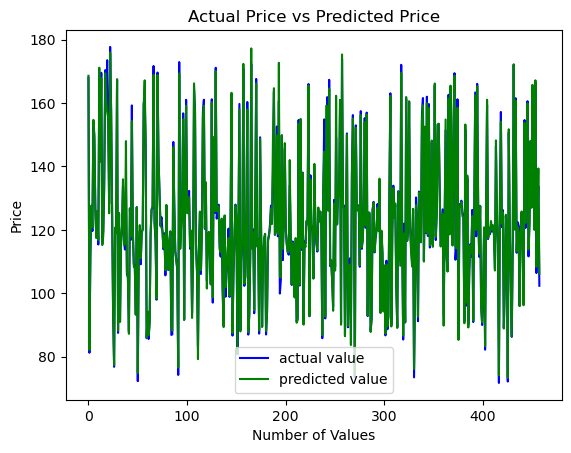

In [50]:
import matplotlib.pyplot as plt

# Assuming y_test and test_data_pred are defined
plt.plot(y_test, color='blue', label='actual value')  # Correct label argument
plt.plot(test_data_pred, color='green', label='predicted value')  # Correct label argument

# Set the title and labels
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('Price')

# Show the legend
plt.legend()

# Show the plot
plt.show()